#TASK 1: Introduction to Keras Implementation

In this notebook, we will train a machine learning model using Keras framework.
We also use Scikit-learn for data preprocessing and evaluation. Kindly check the
following links for more details:

1. https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
2. https://keras.io/getting_started/
3. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

For the dataset, we use IRIS dataset. IRIS dataset consist of 150 datapoints with four input features ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"] and three output classes ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]. You can [download](http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data) the iris flowers dataset from the UCI Machine Learning repository.

## Import libraries and Functions

In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import sqlite3

from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from pandas.plotting import parallel_coordinates

import tensorflow as tf

> Tensorflow version

In [70]:
tf.__version__

'2.14.0'

In [71]:
#set seed value to reproduce the results
seed = 42
np.random.seed(seed)

## Load the dataset

<Figure size 640x480 with 0 Axes>

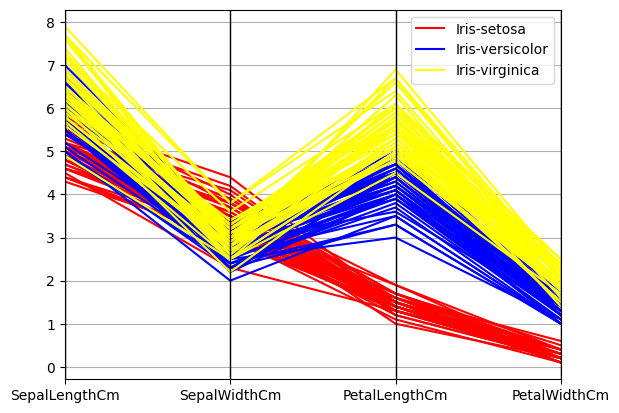

<Figure size 640x480 with 0 Axes>

In [72]:
# Load data from URL using Pandas
csv_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
col_names = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']
data =  pd.read_csv(csv_url, names = col_names)

#Do Parallel Plot
parallel_coordinates(data, 'Species', color=('#FF0000', '#0000FF', '#FFFF00'))
plt.figure()

In [73]:
# Display information about the dataset
print('First five rows in the dataset:\n', data.head(5))
print('=====================================================================================================')
print('Information about Data:')
print(data.info())

# Split dataset into input features and class labels
Y = data['Species']
X = data.drop(['Species'], axis=1)
print('=====================================================================================================')
print("Shape of Input  features: {}".format(X.shape))
print("Shape of Output features: {}".format(Y.shape))
print('=====================================================================================================')
print("Check the number of datapoints for each class label:")
print(Y.value_counts())

#One hot encode the class labels
lbl_clf = LabelEncoder()
Y_encoded = lbl_clf.fit_transform(Y)
Y_final = tf.keras.utils.to_categorical(Y_encoded)
print('=====================================================================================================')
print("Therefore, our final shape of output feature will be {}".format(Y_final.shape))

First five rows in the dataset:
    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa
Information about Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
Shape of Input  features: (150, 4)
S

## Splitting the dataset in 75-25 ratio

In [74]:
#Split the dataset into train and test set using train_test_split() from sklearn
x_train, x_test, y_train, y_test = train_test_split(X, Y_final, test_size=0.25, random_state=seed, stratify=Y_encoded, shuffle=True)

print("Training Input shape\t: {}".format(x_train.shape))
print("Testing Input shape\t: {}".format(x_test.shape))
print("Training Output shape\t: {}".format(y_train.shape))
print("Testing Output shape\t: {}".format(y_test.shape))

Training Input shape	: (112, 4)
Testing Input shape	: (38, 4)
Training Output shape	: (112, 3)
Testing Output shape	: (38, 3)


## Standardizing the dataset

In [75]:
#Normalize the dataset using StandardScaler() from sklearn
std_clf = StandardScaler()
x_train_new = std_clf.fit_transform(x_train)
x_test_new = std_clf.transform(x_test)

In [76]:
#Define the neural network architecture. Check Keras documentation for more info

#Define a Sequential model
model = tf.keras.models.Sequential(name="MLP-1")

#First Hidden Layer with 10 neurons that takes 4 dimensional input value and relu activation
model.add(tf.keras.layers.Dense(10, input_dim=4, activation=tf.nn.relu, kernel_initializer="normal",
                                kernel_regularizer=tf.keras.regularizers.l2(0.01),
                                name="hidden_layer_1"))

#Apply Batch Normalization to the output values of the first hidden layer
model.add(tf.keras.layers.BatchNormalization(name="batchnorm_1"))

#Adding Dropout to the first hidden layer with probability of 0.3
model.add(tf.keras.layers.Dropout(0.3,name="dropout_1"))

#Second Hidden Layer with 7 neurons that takes 10 dimensional input value from previous layer and relu activation
model.add(tf.keras.layers.Dense(7, activation = tf.nn.relu, kernel_initializer="normal",
                                kernel_regularizer=tf.keras.regularizers.L1L2(l1=0.001, l2=0.001),
                                name="hidden_layer_2"))

#Apply Batch Normalization to the output values of the second hidden layer
model.add(tf.keras.layers.BatchNormalization(name="batchnorm_2"))

#Adding Dropout to the second hidden layer with probability of 0.3
model.add(tf.keras.layers.Dropout(0.3, name="dropout_2"))

#Third Hidden Layer with 5 neurons that takes 7 dimensional input value from previous layer and relu activation
model.add(tf.keras.layers.Dense(5, activation = tf.nn.relu, kernel_initializer="normal",
                                kernel_regularizer=tf.keras.regularizers.L1L2(l1=0.001,l2=0.001),
                                name="hidden_layer_3"))

#Apply Batch Normalization to the output values of the third hidden layer
model.add(tf.keras.layers.BatchNormalization(name="batchnorm_3"))

#Adding Dropout to the third hidden layer with probability of 0.3
model.add(tf.keras.layers.Dropout(0.3, name="dropout_3"))

#Output Layer with Softmax activation
model.add(tf.keras.layers.Dense(3, activation=tf.nn.softmax,name="output_layer"))

#Once a model is "built", you can call its summary() method to display its contents
model.summary()

Model: "MLP-1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 10)                50        
                                                                 
 batchnorm_1 (BatchNormaliz  (None, 10)                40        
 ation)                                                          
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 hidden_layer_2 (Dense)      (None, 7)                 77        
                                                                 
 batchnorm_2 (BatchNormaliz  (None, 7)                 28        
 ation)                                                          
                                                                 
 dropout_2 (Dropout)         (None, 7)                 0     

## Training

In [77]:
#Configure the model for training. Define the hyperparatmeters: optimizer, loss and metrics
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Train the model
iris_model = model.fit(x_train_new, y_train, epochs=50, batch_size=7)

Epoch 1/50
16/16 [==============================] - 2s 5ms/step - loss: 1.0286 - accuracy: 0.4821
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 0.8471 - accuracy: 0.5446
Epoch 3/50
16/16 [==============================] - 0s 5ms/step - loss: 0.8054 - accuracy: 0.6250
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 0.8850 - accuracy: 0.5625
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 0.8012 - accuracy: 0.6429
Epoch 6/50
16/16 [==============================] - 0s 5ms/step - loss: 0.7733 - accuracy: 0.6786
Epoch 7/50
16/16 [==============================] - 0s 5ms/step - loss: 0.7550 - accuracy: 0.6696
Epoch 8/50
16/16 [==============================] - 0s 5ms/step - loss: 0.7215 - accuracy: 0.7589
Epoch 9/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.7232
Epoch 10/50
16/16 [==============================] - 0s 5ms/step - loss: 0.6395 - accuracy: 0.6964
Epoch 11/50
16/16 [

## Evaluation

In [78]:
from sklearn.metrics import classification_report

#Evaluate the model on test set
score = model.evaluate(x_test_new, y_test, verbose=0)

#Score has two values. The first value represent loss and the second value represent the accuracy
print("Test loss:      ", score[0])
print("Test accuracy:  ", 100*score[1])

#Get the model predictions on test set
y_pred = model.predict(x_test_new)
#Get the index of the highest value for each predictions (predicted class labels)
y_pred = np.argmax(y_pred, axis = 1)
#Convert the one hot vector to True class labels
y_test_1 = np.argmax(y_test, axis =1)

#Compute Precision, Recall, F1-Score and Accuracy of the model on the test set
print('=====================================================================================================')
print(classification_report(y_test_1, y_pred, target_names=["Iris-setosa", "Iris-versicolor", "Iris-virginica"]))
print('=====================================================================================================')

Test loss:       0.1982814371585846
Test accuracy:   97.36841917037964
2/2 [==============================] - 0s 10ms/step
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.97        38
      macro avg       0.98      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



## Try a different neural network

Define your neural network architecture below. You can use the model in the previous cell as a reference or check out the following link:
https://keras.io/guides/sequential_model/

In [82]:
"""
my_model = tf.keras.models.Sequential()
my_model.add()



my_model.summary()

"""

'\nmy_model = tf.keras.models.Sequential()\nmy_model.add()\n\n\n\nmy_model.summary()\n\n'

## Train your model

Train the model that you have defined above. Choose the hyperparameters from Keras before training. Check the following link for more information:
https://keras.io/api/models/model_training_apis/

In [83]:
"""
optimizer =
loss =
metrics =['']
epochs=
batch_size=

my_model.compile(optimizer, loss, metrics)
my_model = my_model.fit(x_train_new, y_train, epochs, batch_size)

"""

"\noptimizer =\nloss =\nmetrics =['']\nepochs=\nbatch_size=\n\nmy_model.compile(optimizer, loss, metrics)\nmy_model = my_model.fit(x_train_new, y_train, epochs, batch_size)\n\n"

## Evaluate your model

In [84]:
"""
myscore = my_model.evaluate(x_test_new, y_test, verbose=0)
print("Test loss:      ", myscore[0])
print("Test accuracy:  ", 100*myscore[1])
my_pred = my_model.predict(x_test_new)
my_pred = np.argmax(my_pred, axis = 1)

print('=====================================================================================================')
print(classification_report(y_test_1, my_pred, target_names=["Iris-setosa", "Iris-versicolor", "Iris-virginica"]))
print('=====================================================================================================')

"""

'\nmyscore = my_model.evaluate(x_test_new, y_test, verbose=0)\nprint("Test loss:      ", myscore[0])\nprint("Test accuracy:  ", 100*myscore[1])\nmy_pred = my_model.predict(x_test_new)\nmy_pred = np.argmax(my_pred, axis = 1)\n\nprint(\'=====================================================================================================\')\nprint(classification_report(y_test_1, my_pred, target_names=["Iris-setosa", "Iris-versicolor", "Iris-virginica"]))\nprint(\'=====================================================================================================\')\n\n'

# TASK 2: MNIST Example

In this task, we will visualize the train and test accuracy along with the test set predictions after every batch in an epoch using live plot.

## Plotting

In [85]:
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from IPython.display import clear_output
import random

def imgrid(x,y,yp,xx,yy):
    ind = [i for i in range(x.shape[0])]
    random.shuffle(ind)

    plt.figure(figsize=(18,yy*2))
    for i in range(xx*yy):
        plt.subplot(yy,xx,i+1)
        if x.shape[3]==1:
            plt.imshow(x[ind[i],:,:,0],cmap='gray')
        else:
            plt.imshow(x[ind[i],:,:,:])

        if len(yp)>0:
            plt.title('p=%d, gt=%d'%(yp[ind[i]],y[ind[i]]))
        else:
            plt.title('label=%d'%(y[ind[i]]))
        plt.axis('off')
    plt.show()

def live_plot(x, y, yp, acc, acc_test, batch, bs, N, xx, yy):
    clear_output(wait=True)

    ind = [i for i in range(x.shape[0])]

    fig = plt.figure(figsize=(18, 10))
    outer = gridspec.GridSpec(2, 1, hspace=0.2)
    inner = gridspec.GridSpecFromSubplotSpec(yy, xx,
                    subplot_spec=outer[0], wspace=0.1, hspace=0.0)

    for i in range(xx*yy):
        ax = plt.Subplot(fig, inner[i])
        if x.shape[3]==1:
            ax.imshow(x[ind[i],:,:,0],cmap='gray')
        else:
            ax.imshow(x[ind[i],:,:,:])
        if yp[ind[i]] == y[ind[i]]:
            ax.set_title('Pred = %d'%(yp[ind[i]]), color='g')
        else:
            ax.set_title('Pred = %d'%(yp[ind[i]]), color='r')
        ax.axis('off')
        fig.add_subplot(ax)

    inner = gridspec.GridSpecFromSubplotSpec(1, 1,
                    subplot_spec=outer[1], wspace=0.0, hspace=0.1)
    ax = plt.Subplot(fig, inner[0])
    ax.plot(np.linspace(0,batch*bs/N,len(acc)),100.0*np.array(acc),label='Training')
    ax.plot(np.linspace(0,batch*bs/N,len(acc_test)),100.0*np.array(acc_test),label='Test')
    ax.plot(batch*bs/N,100*acc[-1],'o')
    ax.plot(batch*bs/N,100*acc_test[-1],'o')
    ax.legend()
    ax.grid(1)
    ax.set_xlim([0,np.maximum(1,batch*bs/N)])
    ax.set_ylim([np.minimum(np.min(100.0*np.array(acc)),np.min(100.0*np.array(acc_test))),100])
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Accuracy')
    fig.add_subplot(ax)

    plt.show()

class CustomCallback(keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        self.l_train = []
        self.l_test = []
        self.bs = 128
        self.batch = 0

    def on_train_batch_end(self, batch, logs=None):
        self.l_train.append(logs['accuracy'])
        self.batch += 1

        if np.mod(batch,10)==0:
            score = model.evaluate(x_test, y_test, verbose=0)
            self.l_test.append(score[1])

            yp_test = np.argmax(model.predict(x_test[:24]),1)
            live_plot(x_test,np.argmax(y_test[:24],1),yp_test,self.l_train,self.l_test,self.batch,self.bs,len(x_train)-self.bs,12,2)

## Load Data

In [86]:
import numpy as np
import keras

#load MNIST dataset from keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print('x train shape = ', x_train.shape)
print('y train shape = ', y_train.shape)
print('x test shape = ', x_test.shape)
print('y test shape = ', y_test.shape)
print('y train = ', y_train)

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# One hot encoding of class labels
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

print('\n...\n')
print('x train shape = ', x_train.shape)
print('y train shape = ', y_train.shape)
print('x test shape = ', x_test.shape)
print('y test shape = ', y_test.shape)
print('y train = ', y_train)

x train shape =  (60000, 28, 28)
y train shape =  (60000,)
x test shape =  (10000, 28, 28)
y test shape =  (10000,)
y train =  [5 0 4 ... 5 6 8]

...

x train shape =  (60000, 28, 28, 1)
y train shape =  (60000, 10)
x test shape =  (10000, 28, 28, 1)
y test shape =  (10000, 10)
y train =  [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


## Display Images

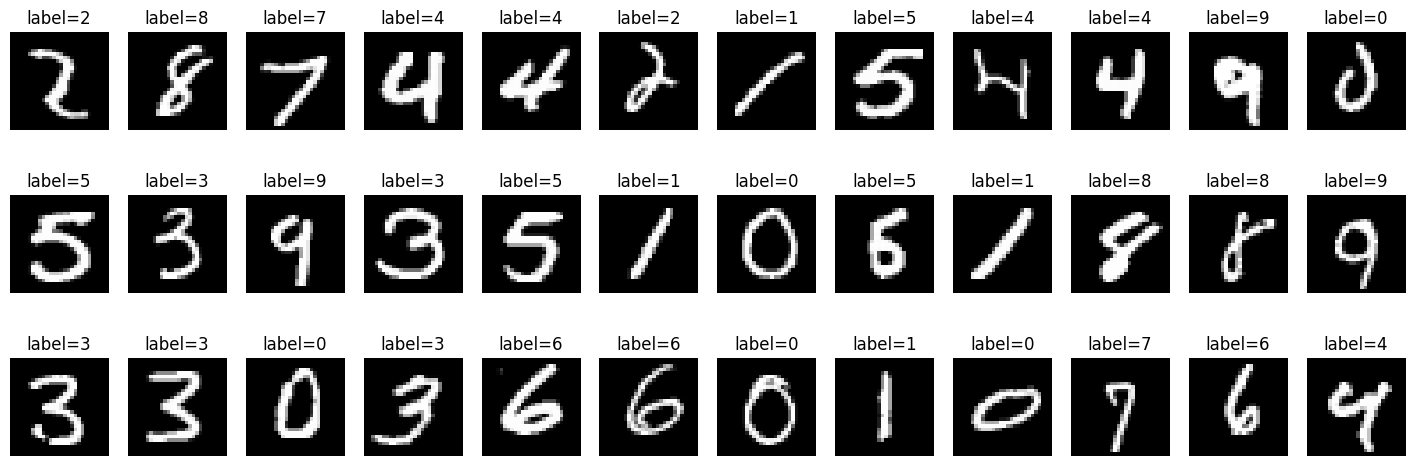

In [87]:
imgrid(x_train,np.argmax(y_train,1),[],12,3)

## Model Definition

In [88]:
from tensorflow.keras import layers

keras.backend.clear_session()

#Define model architecture
model = keras.Sequential(
      [
          layers.InputLayer(input_shape=(28,28,1)),
          layers.Conv2D(8, kernel_size=(3, 3), activation="relu"),
          layers.Conv2D(8, kernel_size=(3, 3), activation="relu"),
          layers.MaxPooling2D(pool_size=(2, 2)),
          layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
          layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
          layers.MaxPooling2D(pool_size=(2, 2)),
          layers.Flatten(),
          layers.Dense(128, activation="relu"),
          layers.Dense(10, activation="softmax"),
      ])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 8)         584       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 8)         0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 32)        2336      
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 32)          9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 32)          0         
 g2D)                                                   

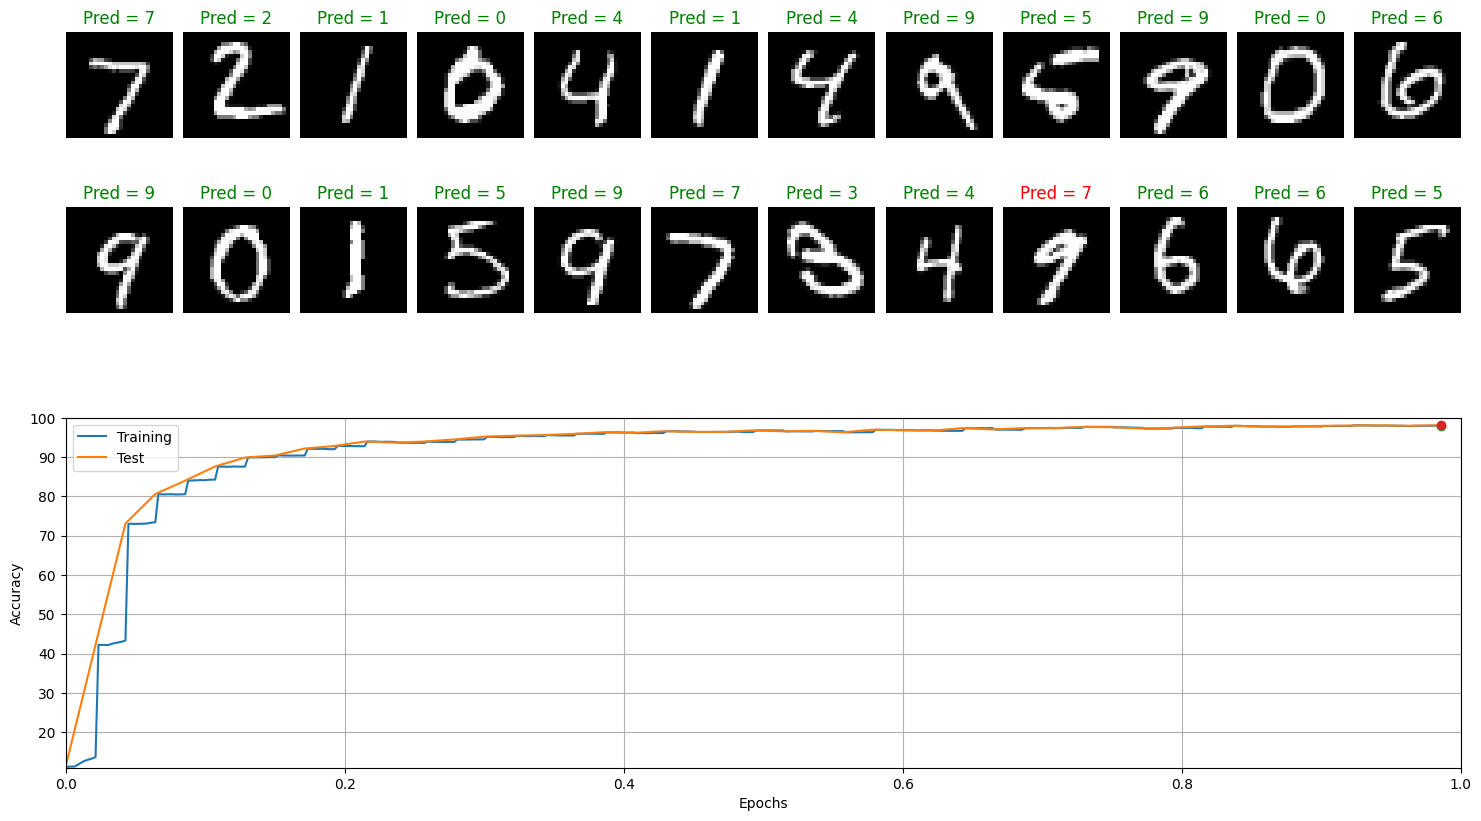

In [89]:
opt = keras.optimizers.Adam(lr=0.001)
#Configure the model for training
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

#Train the model for 1 Epoch
model.fit(x_train, y_train, batch_size=128, epochs=1,
          callbacks=[CustomCallback()],
          validation_split=0.0, verbose=0);

## Evaluate

In [90]:
#Displaying the training performance
score = model.evaluate(x_train, y_train, verbose=0)
print("Train loss:     ", score[0])
print("Train accuracy: ", 100*score[1])

#Displaying the test performance
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:      ", score[0])
print("Test accuracy:  ", 100*score[1])

Train loss:      0.07305290549993515
Train accuracy:  97.81500101089478
Test loss:       0.0635823979973793
Test accuracy:   98.05999994277954
